✅ Saved housing_train_processed.csv with 24 features


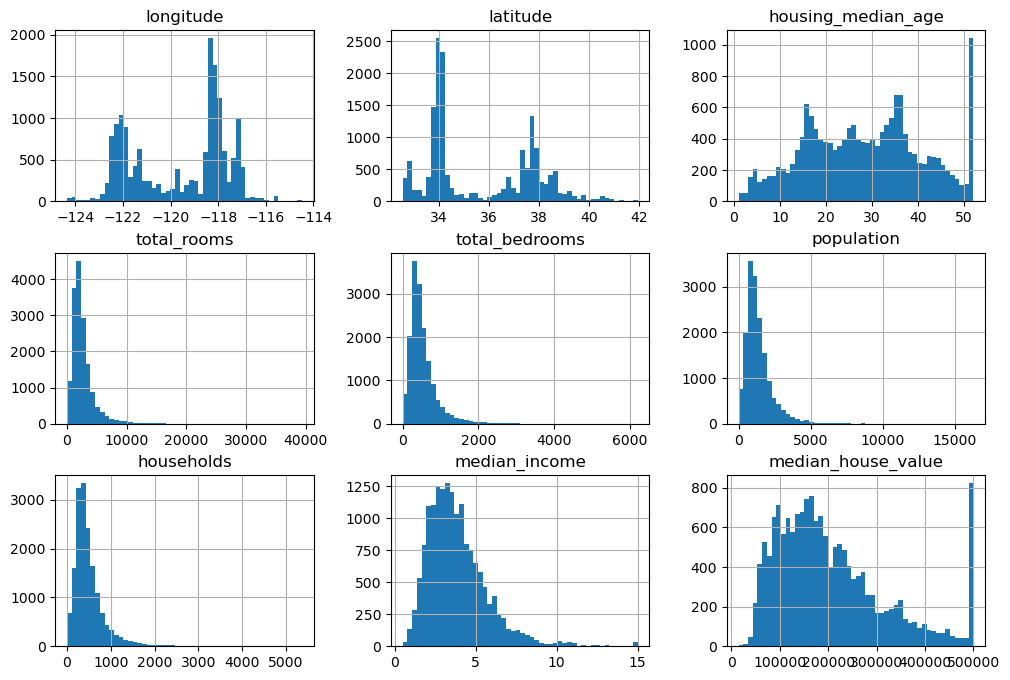

In [1]:
# 📓 eda.ipynb – Exploratory Data Analysis & Feature Engineering

# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import os

# --- Load raw training data ---
housing = pd.read_csv("../data/train/housing_train.csv")

# --- Quick visualizations ---
housing.hist(bins=50, figsize=(12, 8))
plt.savefig("../images/histograms.png")

# --- Split features & labels ---
housing_labels = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)

# --- Numerical / Categorical columns ---
num_features = housing.select_dtypes(include=[np.number]).columns.tolist()
cat_features = ["ocean_proximity"]

# --- Pipelines ---
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler())
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", OneHotEncoder(), cat_features)
])

# --- Apply transformations ---
housing_prepared = full_pipeline.fit_transform(housing)

# --- Save processed data ---
feature_names = num_features + list(full_pipeline.named_transformers_["cat"].get_feature_names_out())
processed_df = pd.DataFrame(housing_prepared, columns=feature_names)
processed_df["median_house_value"] = housing_labels

os.makedirs("../data/train", exist_ok=True)
processed_df.to_csv("../data/train/housing_train_processed.csv", index=False)

print("✅ Saved housing_train_processed.csv with 24 features")